<a href="https://colab.research.google.com/github/mkbahk/AmazonBraket/blob/main/QuantumToyAlgorithm_QuantumTeleportation_12_UQI_Lession04_mkbahk_20250318.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install qiskit[visualization]==1.2.4
%pip install qiskit-aer==0.15.1
%pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 51.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 4.8 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=5c5f0e1200ea2b5776b9b0107d103f421782e19307fdcae93f82859f23324cb8
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 73.1 MB/s eta 0:00:00
  Cloning https://github.com/qis

In [3]:
%pip show qiskit
%pip show qiskit-aer

Name: qiskit
Version: 1.2.4
Summary: An open-source SDK for working with quantum computers at the level of extended quantum circuits, operators, and primitives.
Home-page: https://www.ibm.com/quantum/qiskit
Author: 
Author-email: Qiskit Development Team <qiskit@us.ibm.com>
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: dill, numpy, python-dateutil, rustworkx, scipy, stevedore, symengine, sympy, typing-extensions
Required-by: qiskit-aer, qiskit-textbook
Name: qiskit-aer
Version: 0.15.1
Summary: Aer - High performance simulators for Qiskit
Home-page: https://github.com/Qiskit/qiskit-aer
Author: AER Development Team
Author-email: qiskit@us.ibm.com
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: numpy, psutil, qiskit, scipy
Required-by: 


In [4]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile, assemble
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram, plot_state_city, plot_bloch_multivector
from qiskit_textbook.tools import array_to_latex
from IPython.display import display, Math
import numpy as np
from qiskit.quantum_info import Statevector

# Quantum Teleportation: q[0]의 상태값을 q[1]에 복사시키는 것
## 왜, 양자역할이론에서 복사불가정리(no-cloning theorem)에 의하여 Qubit간에 복사가 되지 않는데, 복사는 하는 효과를 낼 수 있음.

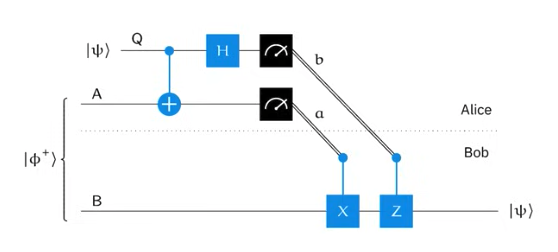

https://www.youtube.com/watch?v=GSsElSQgMbU&list=PLOFEBzvs-VvqKKMXX4vbi4EB1uaErFMSO&index=6

In [13]:
qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.reset(qreg_q[0])
circuit.reset(qreg_q[1])
circuit.reset(qreg_q[2])

circuit.x(qreg_q[0])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])

circuit.cx(qreg_q[0], qreg_q[1])
circuit.h(qreg_q[0])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])

circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])


sv0 = creg_c[0]
sv1 = creg_c[1]
#양자상태를 Classical Network으로 전송했다고 시뮬레이션
rv0 = sv0
rv1 = sv1


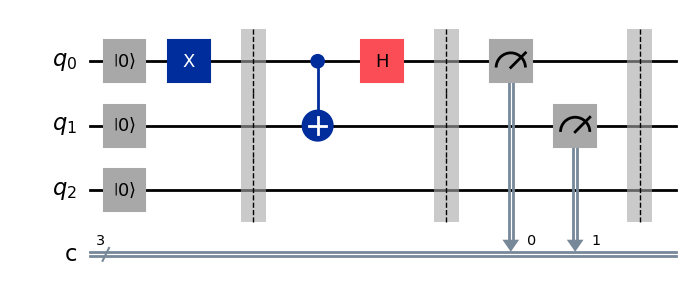

In [14]:
circuit.draw("mpl")

In [15]:
rv0

Clbit(ClassicalRegister(3, 'c'), 0)

In [16]:
rv1

Clbit(ClassicalRegister(3, 'c'), 1)

In [17]:
qreg_q2 = QuantumRegister(3, 'q')
creg_c2 = ClassicalRegister(3, 'c')
circuit2 = QuantumCircuit(qreg_q2, creg_c2)

circuit2.reset(qreg_q2[0])
circuit2.reset(qreg_q2[1])
circuit2.reset(qreg_q2[2])


circuit2.barrier(qreg_q2[0], qreg_q2[1], qreg_q2[2])
circuit2.x(qreg_q2[2]).c_if(rv1, 1)
circuit2.z(qreg_q2[2]).c_if(rv0, 1)


circuit2.measure(qreg_q2[2], creg_c2[2])


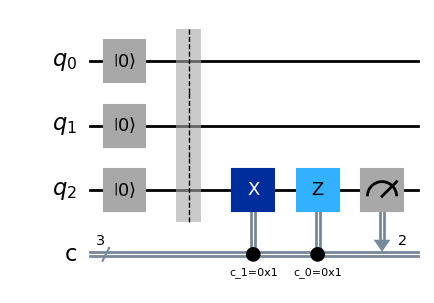

In [18]:
circuit2.draw("mpl")

In [23]:
creg_c2[0]

Clbit(ClassicalRegister(3, 'c'), 0)

In [24]:
creg_c2[1]

Clbit(ClassicalRegister(3, 'c'), 1)

Counts: {'000': 1024}


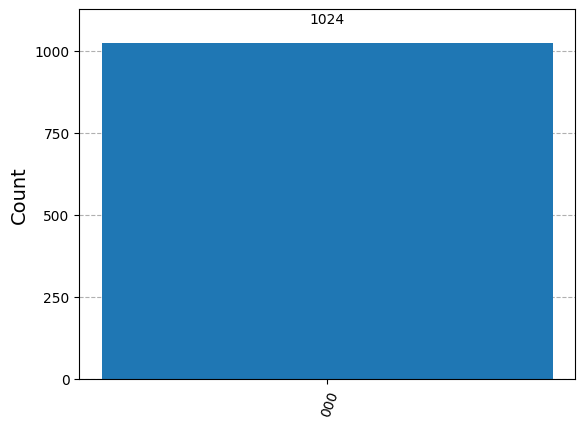

In [20]:
# 결과 출력
counts = result.get_counts()
print("Counts:", counts)
plot_histogram(counts)

In [19]:
# 시뮬레이터로 실행
simulator = Aer.get_backend('qasm_simulator')
result = simulator.run(circuit2, shots=1024).result()

# 결과를 해석하는 법

# 큐빗 순서는 q[2], q[1], q[0] 순입니다. q[0] = 1 로 했으니, q[2] 가 1이 되어야 합니다.
# 위 결과 중 두번째와 "101"과 마지막 "111"의 경우  즉, 마지막 숫자가 "1", q[0]가 "1"인 경우는 반드시 첫번째 숫자는 "1"입니다. 마지막 숫자가 "0"인 경우는 무시하면 됨

In [ ]:
new_counts = {}
for key, value in counts.items():
  if key.endswith('1'):
    new_counts[key] = value
  ###if
###for

print("New Counts:", new_counts)

New Counts: {'111': 548}


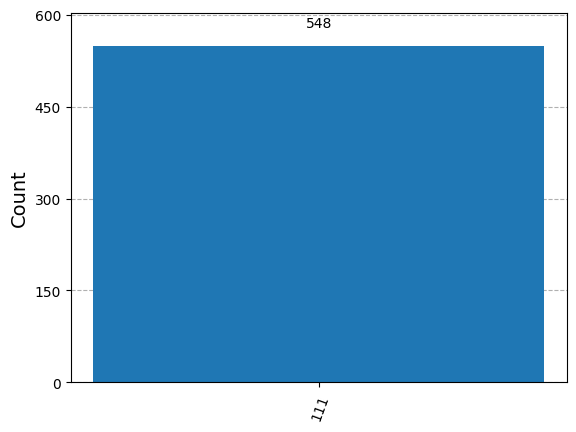

In [ ]:
plot_histogram(new_counts)